In [41]:
#sklearn imports
import sklearn
from sklearn import preprocessing, neighbors
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#matplotlib imports
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

#other imports
import pandas as pd
import numpy as np
import random, os
import csv
from typing import Tuple

rng = 1

def seed_everything(seed=3):
   """"
   Seed everything.
   """   
   random.seed(seed)
   os.environ['PYTHONHASHSEED'] = str(seed)
   np.random.seed(seed)
    
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [42]:
#cluster test/train data
def get_clusters(X_train: pd.DataFrame, X_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    applies k-means clustering to training data to find clusters and predicts them for the test set
    """
    clustering = KMeans(n_clusters=n_clusters, random_state=rng)
    clustering.fit(X_train)
    # apply the labels to the training set
    train_labels = clustering.labels_
    X_train_clstrs = X_train.copy()
    X_train_clstrs['clusters'] = train_labels
    
    # predict labels on the test set
    test_labels = clustering.predict(X_test)
    X_test_clstrs = X_test.copy()
    X_test_clstrs['clusters'] = test_labels
    return X_train_clstrs, X_test_clstrs

#scale each feature
def scale_features(X_train: pd.DataFrame, X_test: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    applies standard scaler (z-scores) to training data and predicts z-scores for the test set
    """
    scaler = StandardScaler()
    to_scale = [col for col in X_train.columns.values]
    scaler.fit(X_train[to_scale])
    X_train[to_scale] = scaler.transform(X_train[to_scale])
    
    # predict z-scores on the test set
    X_test[to_scale] = scaler.transform(X_test[to_scale])
    
    return X_train, X_test



In [43]:
#read in train/test data
df = pd.read_csv('..\..\data\_All_Receptors_runs_1_2_3_binary.csv')

df = df[['filename','Hits', 'max_feat', 'avg_feat', 'max_centr', 'min_centr', 'avg_centr', 'features', 'all_same', 's_score', 'hyd_prop', 'don_prop', 'catdon_prop', 'hydaro_prop', 'aniacc_prop', 'quality']]
df.fillna(-99999)

predictors = list(df.columns)
predictors = predictors[:-1]

print('Predictors:', predictors,'\n')


#split data into quality/not quality sets
q_ph4s = df[df['quality'] == 1]
nq_ph4s = df[df['quality'] != 1]

#ensure that there is an equal number of nq ph4s
nq_ph4s = nq_ph4s.sample(n=1*len(q_ph4s), random_state = rng)

#merge arrays prior to TTS
frames = [q_ph4s, nq_ph4s]
df = pd.concat(frames)

# get filenames
filenames = df['filename']

#x is features, y is classes
x = df.drop(['filename','quality'], axis=1)
y = df.quality

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=rng)

print("x_train ph4s:", len(x_train),'\n')
print("x_train Q ph4s:", y_train.sum(),'\n')
print("x_test ph4s:", len(x_test),'\n')
print("x_test Q ph4s:",y_test.sum(),'\n')

X_train_4clstrs, X_test_4clstrs = get_clusters(x_train, x_test, 4)
X_train_5clstrs, X_test_5clstrs = get_clusters(x_train, x_test, 5)

Predictors: ['filename', 'Hits', 'max_feat', 'avg_feat', 'max_centr', 'min_centr', 'avg_centr', 'features', 'all_same', 's_score', 'hyd_prop', 'don_prop', 'catdon_prop', 'hydaro_prop', 'aniacc_prop'] 

x_train ph4s: 5431 

x_train Q ph4s: 2739 

x_test ph4s: 1811 

x_test Q ph4s: 882 



In [45]:
X_train_5clstrs

,Hits,max_feat,avg_feat,max_centr,min_centr,avg_centr,features,all_same,s_score,hyd_prop,don_prop,catdon_prop,hydaro_prop,aniacc_prop,clusters
84488,5,6.578860,4.903090,5.716850,2.251601,3.949062,5,0,-0.750000,0.60,0.0,0.0,0.0,0.2,0
58160,3,8.956616,5.913907,8.088640,1.663871,5.470195,5,0,-1.138252,0.40,0.0,0.2,0.0,0.0,0
106183,6,9.973972,6.393449,11.470008,3.589035,6.036092,5,0,-0.863636,0.80,0.2,0.0,0.0,0.0,0
106039,2,9.735231,5.840647,8.298027,3.119316,5.820265,5,0,-1.890747,0.80,0.0,0.2,0.0,0.0,0
45733,0,15.559603,8.621021,14.103107,10.606219,12.527609,4,0,-1.450000,0.25,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59079,7,9.667666,6.560852,10.763179,3.217579,7.462650,5,0,-1.377778,0.40,0.2,0.0,0.0,0.0,0
35381,0,16.103331,8.242273,14.961987,3.225838,6.817597,5,0,-2.238905,0.20,0.2,0.0,0.0,0.2,3
56669,4,7.637141,5.072890,10.239852,6.485053,7.864075,5,0,-1.270000,0.40,0.4,0.0,0.0,0.0,0
25915,4,9.162118,4.941999,12.340685,8.443437,10.330987,5,0,-3.202875,0.20,0.2,0.2,0.0,0.0,0


In [46]:
# put filenames back into dfs
X_train_4clstrs['filename'] = df['filename']
X_test_4clstrs['filename'] = df['filename']
X_train_5clstrs['filename'] = df['filename']
X_test_5clstrs['filename'] = df['filename']

In [51]:
# get cluster 0 pharmacophore models for each k value
X_train_4clstrs_c0 = X_train_4clstrs[X_train_4clstrs['clusters'] == 0]
X_test_4clstrs_c0 = X_test_4clstrs[X_test_4clstrs['clusters'] == 0]

X_train_5clstrs_c0 = X_train_5clstrs[X_train_5clstrs['clusters'] == 0]
X_test_5clstrs_c0 = X_test_5clstrs[X_test_5clstrs['clusters'] == 0]

In [58]:
print(len(X_train_4clstrs_c0))
print(len(X_test_4clstrs_c0))
print(len(X_train_5clstrs_c0))
print(len(X_test_5clstrs_c0))

2721
864
2644
871


In [55]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

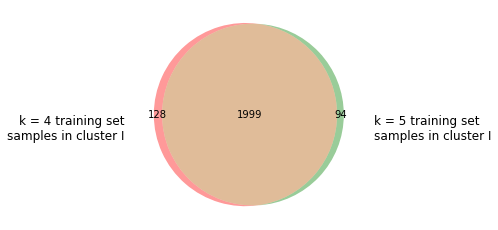

In [91]:
plt.figure(figsize=(4,4))
set1 = set(X_train_4clstrs_c0['filename'])
set2 = set(X_train_5clstrs_c0['filename'])

vd = venn2([set1, set2], ('A', 'B'))

vd.get_label_by_id('A').set_x(-0.75)
vd.get_label_by_id('A').set_y(0)
vd.get_label_by_id('A').set_text('k = 4 training set\nsamples in cluster I')

vd.get_label_by_id('B').set_x(0.75)
vd.get_label_by_id('B').set_y(0)
vd.get_label_by_id('B').set_text('k = 5 training set\nsamples in cluster I')

plt.show()

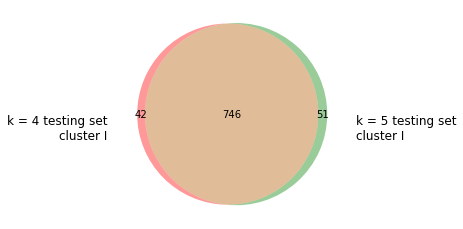

In [89]:
plt.figure(figsize=(4,4))
set1 = set(X_test_4clstrs_c0['filename'])
set2 = set(X_test_5clstrs_c0['filename'])

vd = venn2([set1, set2], ('A', 'B'))

vd.get_label_by_id('A').set_x(-0.75)
vd.get_label_by_id('A').set_y(0)
vd.get_label_by_id('A').set_text('k = 4 testing set\ncluster I')

vd.get_label_by_id('B').set_x(0.75)
vd.get_label_by_id('B').set_y(0)
vd.get_label_by_id('B').set_text('k = 5 testing set\ncluster I')

plt.show()